In [1]:
#####
# AUTHOR: Prastab Dhakal
# FILENAME: main.py
# SPECIFICATION: 
# To prepare a dataset for analysis, to build and evaluate a model using logistic regression
# make 5 logistic regression models and train with 70-30 and 60-40 train-test set,
# find the best model to perform prediction on whole dataset, 
# analyze with ROC curve, PR Curve and cross validation.

# FOR: CS 4331 Machine Learning and Information Security Section 001
#####

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
# The function reads the given file  from path and stores in datafile dataframe
# datafile : A datafile dataframe containing attributes from A1 to a8 
datafile = pd.read_csv('datafile.csv')

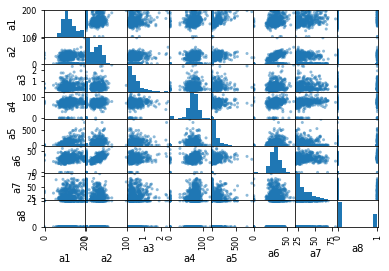

In [4]:

#plotting entire dataframe using pandas scatter_matrix
pd.plotting.scatter_matrix(datafile)
plt.show()


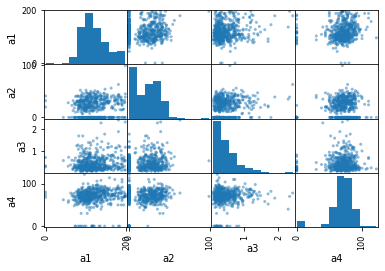

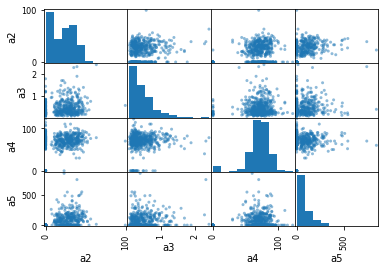

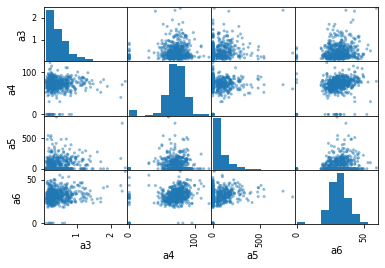

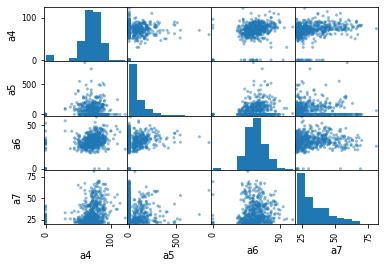

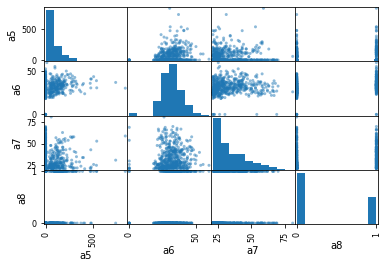

In [5]:
#plotting 4 columns at a time using pandas scatter_matrix
for i in range (5):
    df =datafile.iloc[:,[i,i+1,i+2,i+3]] #select everything from columns i,i+1,i+2,i+3]]
    pd.plotting.scatter_matrix(df) 
    plt.show()

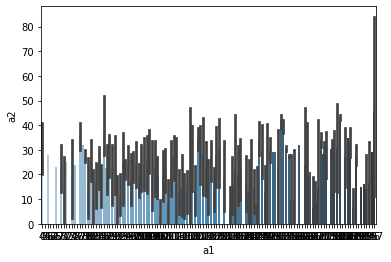

In [6]:
# barplot between a1 and a2 column with blue color palette
sns.barplot(x="a1", y="a2", data=datafile,palette="Blues_d")
plt.show()

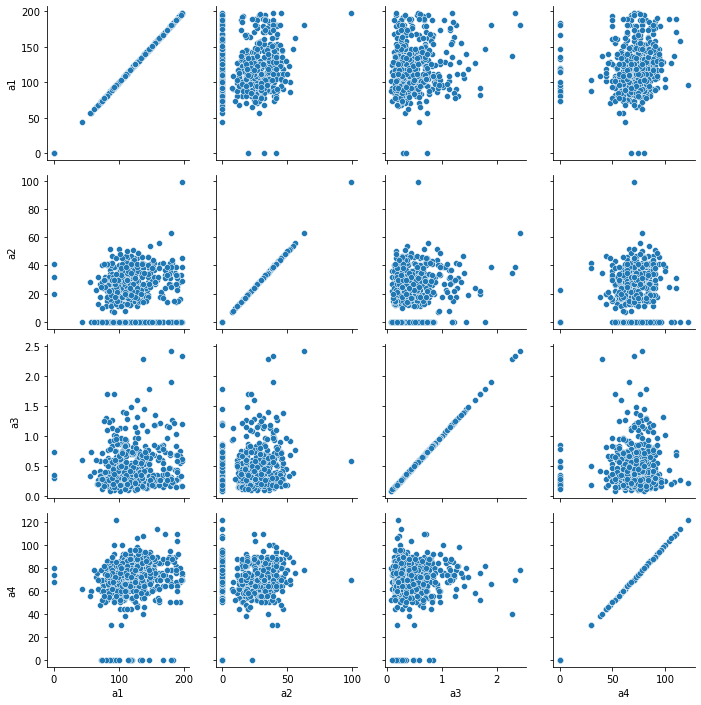

In [7]:
# snsdata contains data of 4 features of datafile 
snsdata = datafile[['a1','a2','a3','a4']]
g = sns.PairGrid(snsdata) #pairing
g.map(sns.scatterplot) #scatterplot
plt.show()

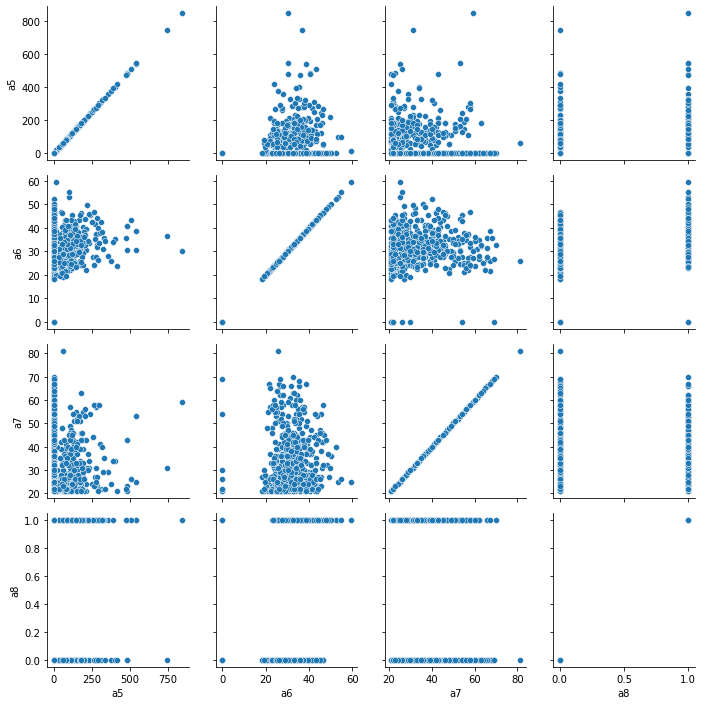

In [8]:
# snsdata contains data of 4 features of datafile 
snsdata = datafile[['a5','a6','a7','a8']]
g = sns.PairGrid(snsdata) #pairing
g.map(sns.scatterplot) #scatterplot
plt.show()

In [9]:
# extract the column a8 contents from dataframe and convert to numpy array 
df_a8 = pd.DataFrame(data=datafile,columns=['a8'])
df_a8.to_numpy()
print("The number of 0's in a8 column is", np.count_nonzero(df_a8 < 1))
print("The number of 1's in a8 column is", np.count_nonzero(df_a8 ==1))
print("The difference between number of 0's and number of 1's in a8 column is", np.count_nonzero(df_a8 < 1)- np.count_nonzero(df_a8 ==1))


The number of 0's in a8 column is 326
The number of 1's in a8 column is 174
The difference between number of 0's and number of 1's in a8 column is 152


In [10]:
# Make a new dataframe by selecting randomly 150 of the rows where a8=1 and 150 of the rows where a8=0.

#a dataframe df of elements from datafile dataframe
df= datafile
# #separate dataframe allzero_df that has a8 colum with value 0
allzero_df = df.loc[df['a8'] == 0]
# #separate dataframe allone_df that has a8 colum with value 1
allone_df =df.loc[df['a8'] == 1]
# # #150 random sampled dataframe stored in rzero150_df from dataframe allzero_df
rzero150_df = allzero_df.sample(n=150)
# # #150 random sampled dataframe stored in rone150_df from dataframe allone_df
rone150_df = allone_df.sample(n=150)
#newdataframe with 300 data after appending rone150_df to rzero150_df
newdataframe = rzero150_df.append(rone150_df) #we will use this dataframe everywhere

In [11]:
####
# NAME: my_logreg_training_model
# PARAMETERS: attributeList,targetAttributeList,test_size
# PURPOSE: The function is a logistic regression training model and trains and tests data to give confusion matrix and accuracy of model
# PRECONDITION: must send all parameters, attributeList as a list of attribute/features, targetAttributeList as a list of target attribute, test_size in decimal nott zero, .3 represents 30%
# POSTCONDITION: accuracy,attributeList,targetAttributeList values are returned so that we can track which model performs best.
####

def my_logreg_training_model(attributeList,targetAttributeList,test_size):
    train, test = train_test_split(newdataframe,test_size=test_size,random_state = 7)
    #split the training set into the X attributes and Y target attribute
    X_train = pd.DataFrame(train[attributeList])
    Y_train = pd.DataFrame(train[targetAttributeList])
    #enable the logistic regression model
    logreg = LogisticRegression(max_iter=5000)
    #build the logistic regression model
    res = logreg.fit(X_train,Y_train.values.ravel())  #Y transformed to 1-d array from vector representation 
    print("\nCoefficients:  ",res.coef_)
    #split the test set into the X attributes and Y target attribute
    X_test = pd.DataFrame(test[attributeList])
    Y_test = pd.DataFrame(test[targetAttributeList])
    #predict the y value on the test set
    y_pred = logreg.predict(X_test)
    #construct a confusion table
    table = metrics.confusion_matrix(test[targetAttributeList].to_numpy(),y_pred,labels=[1,0])
    print("\nConfusion Table")
    print(table)    
    #calculate the true positive rate
    #set tpr to the true positive rate TP/(TP+FN) using tab
    tpr = table[0,0]/(table[0,0]+table[1,0])
    #calculate the true negative rate
    #set tnr to the true negative rate TN/(TN+FP) using tab
    tnr = table[1,1]/(table[1,1]+table[0,1])
    #calculate the accuracy (TP+TN)/(TP+TN+FP+FN)
    accuracy = (table[0,0]+table[1,1])/(table[0,0]+table[1,1]+table[0,1]+table[1,0])
    #set accuracy using table
    print("\naccuracy = ",accuracy)
    return accuracy,attributeList,targetAttributeList


In [12]:
# maxAccuracy : a variable to store the maximum accuracy of the curent model
maxAccuracy = 0
# maxAttributeList : a list to store Attribute list of the model with maximum accuracy
maxAttributeList = []
# maxTargetAttributeList : a list to store Attribute list of the model with maximum accuracy 
maxTargetAttributeList = []

In [13]:
####
# NAME: my_complete_model
# PARAMETERS: none
# PURPOSE: The function is run to perform all the tasks. All the functions and calculations happen inside this function
# PRECONDITION: must be called to execute
# POSTCONDITION: expect overall result
####
def my_complete_model():
    global maxAccuracy,maxAttributeList,maxTargetAttributeList
    
    ####
    # NAME: store_attribute_result
    # PARAMETERS: Maxaccuracy, accuracy,attributeList,targetAttributeList
    # PRECONDITION: must send all parameters,maximum accuracy as Maxaccuracy, current accuraacy as accuracy, attributeList as a list of attribute/features, targetAttributeList as a list of target attribute, test_size in decimal nott zero, .3 represents 30%
    # POSTCONDITION: maxAccuracy,attributeList,targetAttributeList values are globally updated
    ####
    def store_attribute_result(Maxaccuracy, accuracy,attributeList,targetAttributeList):
        global maxAccuracy,maxAttributeList,maxTargetAttributeList
        
        # update and set all parameters, if value of maxaccuracy is less than or equal to current accuracy of model
        if Maxaccuracy <= accuracy:
            maxAccuracy= accuracy
            maxAttributeList = attributeList
            maxTargetAttributeList = targetAttributeList
            
    ####
    # NAME: run_my_models
    # PARAMETERS: test_size
    # PURPOSE: The function is written to call the my_logreg_training_model on the set of attributes, target attribute and test_size we selected. this will give us confusion matrix, accuracy as well as keep tracck of max accuracy and model when store_attribute_result is called.
    # PRECONDITION: must send test case in decimal, 0- 1, 0.3 represents 30%
    # POSTCONDITION: accuracy,attributeList,targetAttributeList are updated for max accuracy model 
    ####      
    def run_my_models(test_size):
        # print train-test split percentage
        print('With train-test ',100-test_size*100,'% - ',test_size*100,'%')
        
        #for 5 models 
        #call my_logreg_training_model and get and store accuracy,attributeList,targetAttributeList
        accuracy,attributeList,targetAttributeList = my_logreg_training_model(['a1','a2','a3','a4','a5','a6','a7'],['a8'],test_size)
        #call store_attribute_result and send maxAccuracy, accuracy,attributeList,targetAttributeList parameters
        store_attribute_result(maxAccuracy, accuracy,attributeList,targetAttributeList)
        
        accuracy,attributeList,targetAttributeList = my_logreg_training_model(['a1','a2','a3'],['a8'],test_size)
        store_attribute_result(maxAccuracy, accuracy,attributeList,targetAttributeList)
        
        accuracy,attributeList,targetAttributeList = my_logreg_training_model(['a3','a4','a5','a6','a7'],['a8'],test_size)
        store_attribute_result(maxAccuracy, accuracy,attributeList,targetAttributeList)
        
        accuracy,attributeList,targetAttributeList = my_logreg_training_model(['a2','a5'],['a8'],test_size)
        store_attribute_result(maxAccuracy, accuracy,attributeList,targetAttributeList)
        
        accuracy,attributeList,targetAttributeList = my_logreg_training_model(['a1','a3','a5','a7'],['a8'],test_size)
        store_attribute_result(maxAccuracy, accuracy,attributeList,targetAttributeList)

        print('***********','End of',100-test_size*100,'% - ',test_size*100,'%', 'train-test run','*****************')
    
    #call run_my_models with test_size =.3 on 5 models    
    run_my_models(test_size=.3)
    #again call run_my_models with test_size =.4 on 5 models    
    run_my_models(test_size=.4)            
    
    print()
    print('The best model has:')
    print('Accuracy: ',maxAccuracy)
    print('Attribute:',maxAttributeList)
    print('Target Attribute:',maxTargetAttributeList)   
    print()
    print('***********','Running the best model in newdataframe','*****************')
    
    ####
    # NAME: best_logreg_model
    # PARAMETERS: attributes,targetAttribute
    # PURPOSE: The function will run the best logistic regression training model dynamically based on the attributes and targetAttribute of best performing model on entire dataset of newdataframe dataframee. 
    # It gives us the confusion matrix, accuracy, roc curve, pr curve and cross validation 
    # PRECONDITION: must send all parameters, attributes,targetAttribute and the dataframe newdataframe must exist
    # POSTCONDITION: -
    ####
 
    def best_logreg_model(attributes,targetAttribute):
        #predict on newdataframe
        #fill in statements to set X_attribute and Y_target_attribute
        X_attribute = pd.DataFrame(newdataframe[attributes])
        Y_target_attribute = pd.DataFrame(newdataframe[targetAttribute])
        
        #enable the logistic regression model
        logreg = LogisticRegression(max_iter=5000)
        #build the logistic regression model
        model = logreg.fit(X_attribute,Y_target_attribute.values.ravel())  #Y transformed to 1-d array from vector representation 
        print("\nCoefficients: ",model.coef_)
        
        #fill in statement to set y_pred_newdataframe using predict
        y_pred_newdataframe = logreg.predict(X_attribute)
        table = metrics.confusion_matrix(newdataframe[targetAttribute].to_numpy(),y_pred_newdataframe,labels=[1,0])
        print("\nConfusion Table for newdataframe")
        print(table)
        #calculate the true positive rate
        #set tpr to the true positive rate TP/(TP+FN) using tab

        tpr = table[0,0]/(table[0,0]+table[1,0])
        #calculate the true negative rate
        #set tnr to the true negative rate TN/(TN+FP) using tab
        tnr = table[1,1]/(table[1,1]+table[0,1])
        #calculate the accuracy (TP+TN)/(TP+TN+FP+FN)
        accuracy = (table[0,0]+table[1,1])/(table[0,0]+table[1,1]+table[0,1]+table[1,0])

        #set accuracy using table
        print("\naccuracy = ",accuracy)
        
        #ROC Curve: Receiver Operating Characteristic 
        #construct the ROC curve
        y_pred_probability = logreg.predict_proba(X_attribute)[::,1]
        fpr, tpr, _ = metrics.roc_curve(Y_target_attribute,y_pred_probability)
        auc = metrics.roc_auc_score(Y_target_attribute,y_pred_probability)
        plt.plot(fpr,tpr,label="data, auc="+str(auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc=4)
        plt.show()
        print("\n The value of AUC obtained from ROC Curve is", auc,"that means the area under the curve is",auc,"This means the model performs better than a random classifier with AUC is equals to 0.5. The nearer the value of AUC to 1, the better it is. The area under the curve also represents how well the model performs with the given threshold ")

        #construct the precision/recall curve
        prec, rec, _ = metrics.precision_recall_curve(Y_target_attribute,y_pred_probability)
        auc = metrics.auc(rec,prec)
        plt.plot(rec,prec,label="data, auc="+str(auc))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PR Curve')
        plt.ylim(0,1.1)
        plt.legend(loc=4)
        plt.show()
        print("\n The precision-recall curve shows the tradeoff between precision and recall for different threshold. The value of AUC obtained from PR Curve is", auc,"that means the  high value of this area signifies high value of precision and recall. The high value of precision and high value of recall signify that the classifier has low false positive rate and low false negative rate respectively. ")

        
        #perform n-fold cross-validation with folds 
        ####
        # NAME: cross_validation
        # PARAMETERS: folds
        # PURPOSE: The function will perform cross validation based on the folds sent, 
        # PRECONDITION: must send all parameters, folds must be integer
        ####
        def cross_validation(folds):
            nfolds = folds
            #instance that splits a dataset into n folds, shuffles prior to the split, and uses a value of 1 for the pseudorandom number generator
            cv = KFold(n_splits=nfolds, random_state=1, shuffle=True)
            scores = cross_val_score(logreg,X_attribute,Y_target_attribute,scoring='accuracy', cv=cv, n_jobs=-1)
            #prediction values
            y_pred = cross_val_predict(logreg,X_attribute,Y_target_attribute,cv=cv,n_jobs=-1)
            #construct confusion matrix
            table = metrics.confusion_matrix(newdataframe['a8'].to_numpy(),y_pred,labels=[1,0])
            print("\nConfusion Table: ")
            print(table)
            print("\nAccuracies:  ",scores)
            print("\nAverage Accuracy:  ",np.mean(scores))
        
        #call cross_validation with folds =  5     
        cross_validation(5)
        #call cross_validation with folds =  4 
        cross_validation(4)

    #call best_logreg_model with maxAttributeList,maxTargetAttributeList as parameters     
    best_logreg_model(maxAttributeList,maxTargetAttributeList)
    
    #Save the new dataframe to a file called “newdatafile.csv” (without a row name column).
    newdataframe.to_csv("newdatafile.csv",index=False)
 

With train-test  70.0 % -  30.0 %

Coefficients:   [[ 0.02345191 -0.00686067  0.50822297 -0.01321778  0.00055883  0.12228627
   0.0243992 ]]

Confusion Table
[[32 15]
 [11 32]]

accuracy =  0.7111111111111111

Coefficients:   [[0.0281411  0.01015791 0.54402168]]

Confusion Table
[[36 11]
 [13 30]]

accuracy =  0.7333333333333333

Coefficients:   [[ 0.46910636 -0.01095695  0.00202024  0.11928102  0.03937562]]

Confusion Table
[[32 15]
 [17 26]]

accuracy =  0.6444444444444445

Coefficients:   [[0.00201696 0.00350088]]

Confusion Table
[[25 22]
 [20 23]]

accuracy =  0.5333333333333333

Coefficients:   [[0.02520541 0.56598328 0.00183934 0.01544334]]

Confusion Table
[[33 14]
 [11 32]]

accuracy =  0.7222222222222222
*********** End of 70.0 % -  30.0 % train-test run *****************
With train-test  60.0 % -  40.0 %

Coefficients:   [[ 0.02447322 -0.00540238  0.58829834 -0.00867462 -0.00087688  0.13169308
   0.02255879]]

Confusion Table
[[43 19]
 [18 40]]

accuracy =  0.691666666666666

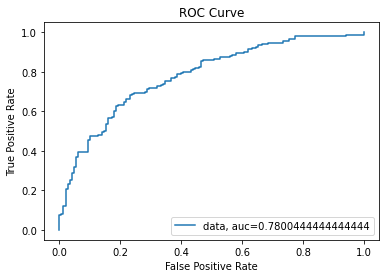


 The value of AUC obtained from ROC Curve is 0.7800444444444444 that means the area under the curve is 0.7800444444444444 This means the model performs better than a random classifier with AUC is equals to 0.5. The nearer the value of AUC to 1, the better it is. The area under the curve also represents how well the model performs with the given threshold 


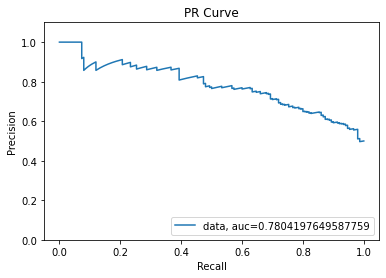


 The precision-recall curve shows the tradeoff between precision and recall for different threshold. The value of AUC obtained from PR Curve is 0.7804197649587759 that means the  high value of this area signifies high value of precision and recall. The high value of precision and high value of recall signify that the classifier has low false positive rate and low false negative rate respectively. 

Confusion Table: 
[[ 98  52]
 [ 35 115]]

Accuracies:   [0.8        0.71666667 0.68333333 0.7        0.65      ]

Average Accuracy:   0.7100000000000001

Confusion Table: 
[[ 99  51]
 [ 38 112]]

Accuracies:   [0.74666667 0.76       0.65333333 0.65333333]

Average Accuracy:   0.7033333333333334


In [14]:
#program starts here 
#call my_complete_model    
my_complete_model() 

In [16]:
#Answer the following questions at the end of your script file using comments:
# 1. Which train-test split worked best for you? 70-30 or another? Why?
# Answer: In the current run, among the 70 - 30 and 60 - 40 train-test split, the 70 - 30 train-test split worked best for me because this model uses more training data and increases the accuracy. 

# 2. Which logistic regression model worked best of the five you tried? Why?
# Answer: In the current run, among the five logistic regression model that we created the one with a1, a2, a3 attributes  with a8 as target attribute worked best for me. One possible reason for this model to work better is because it uses best features to predict whole data,probably a1,a2,a3 are the only features we need.  The answer to why this regression model with these attributes work best is another question to ask  because there are numerous ways we can combine of features . 

# 3. What does the resulting ROC curve tell you about the model?
#  The value of AUC obtained from ROC Curve is 0.7800444444444444 that means the area under the curve is 0.7800444444444444 This means the model performs better than a random classifier with AUC is equals to 0.5. The nearer the value of AUC to 1, the better it is. The area under the curve also represents how well the model performs with the given threshold. 

# 4. What does the resulting PR curve tell you about the model.
# The precision-recall curve shows the tradeoff between precision and recall for different threshold. The value of AUC obtained from PR Curve is 0.7804197649587759 that means the  high value of this area signifies high value of precision and recall. The high value of precision and high value of recall signify that the classifier has low false positive rate and low false negative rate respectively. 

# 5. Which size fold worked the best? Why? 
# The size fold of five work best for me than the size of four because it groups the data 5 even folds. 300/5 = 60 data each. Each It's time the model is trained with four fold(240 data) and tested with one fold(60 data) .
# If we use four folds our data would be 300/4 = 75 . Each It's time the model is trained with 3 fold(225 data) and tested with one fold(75 data) .Since the five fold provides more training data it works better.

#